In [1]:
import glob
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd

In [15]:
def cov_files(data):
    arr = []
    for elem in data:
        arr.append(np.std(elem)/np.mean(elem))
    return arr
        
def mean_files(path_dir):
    arr = []
    for elem in read_files(path_dir):
        arr.append(np.mean(elem))
    return arr

def subs_arr(arr1, arr2):
    res = []
    for elem1, elem2 in zip(arr1, arr2):
        res.append(elem1-elem2)
    return res

def dim_camp(path_dir):
    #95% con  r% 15
    arr = []
    for elem in read_files(path_dir):  
        r = 15
        arr.append(np.power(196*np.std(elem)/(r*np.mean(elem)), 2))
    return arr

def qq_plot(data):
    for elem in data:
        ax = pg.qqplot(elem, dist='norm', confidence=.95)
        test = stats.shapiro(elem)
        print(test)
        plt.show()   

def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.25):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / np.sqrt(len(values))
    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color='#f44336')
    return mean, confidence_interval

def read_file(path):
    df = pd.read_csv(path)
    data = []
    data.append(df['Carico1'].tolist())
    data.append(df['Carico2'].tolist())
    data.append(df['Carico3'].tolist())
    return data

<img src="stefano_vs_vito.png" style="height:300px"/>

In [31]:
stefano_path  = 'C:/Users/stefa/Desktop/Impianti/impianti_pratica/Nbody/Data_Stefano.csv'
paolo_path    = 'C:/Users/stefa/Desktop/Impianti/impianti_pratica/Nbody/Data_paolo.csv'
vito_path     = 'C:/Users/stefa/Desktop/Impianti/impianti_pratica/Nbody/Data_vito.csv'
marco_path    = 'C:/Users/stefa/Desktop/Impianti/impianti_pratica/Nbody/Data_marco.csv'

data_stefano   = read_file(stefano_path)
data_vito      = read_file(vito_path)
data_paolo     = read_file(paolo_path)
marco_path     = read_file(marco_path)

ShapiroResult(statistic=0.9639551043510437, pvalue=0.3892745077610016)


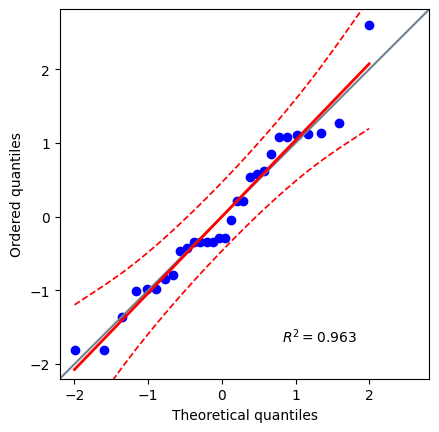

ShapiroResult(statistic=0.9794202446937561, pvalue=0.8099341988563538)


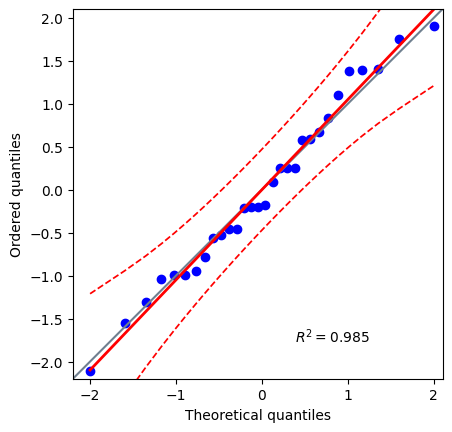

ShapiroResult(statistic=0.9177052974700928, pvalue=0.0233951136469841)


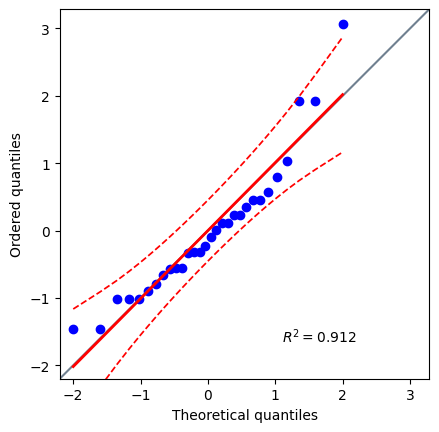

In [32]:
qq_plot(data_stefano)

ShapiroResult(statistic=0.946662187576294, pvalue=0.1375253051519394)


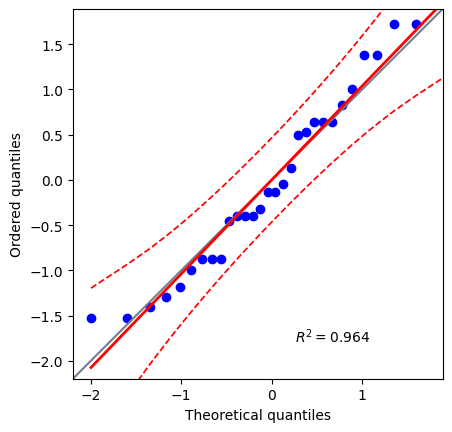

ShapiroResult(statistic=0.9636620283126831, pvalue=0.3828691244125366)


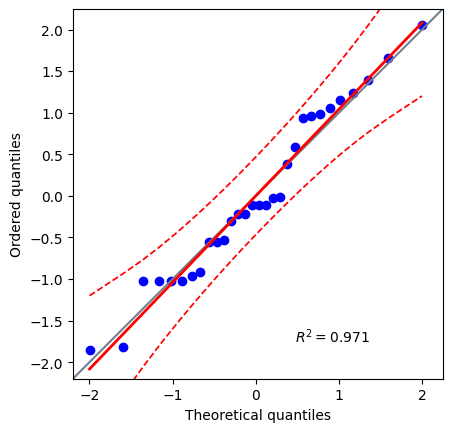

ShapiroResult(statistic=0.9811171889305115, pvalue=0.854422926902771)


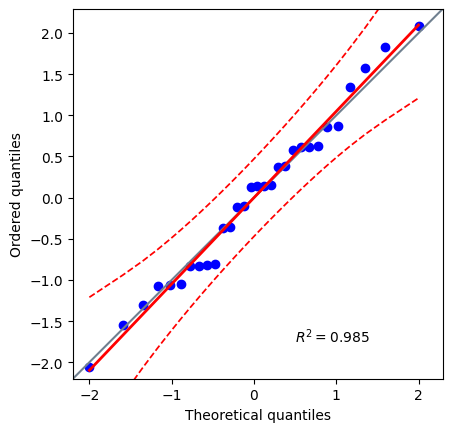

In [22]:
qq_plot(data_vito)

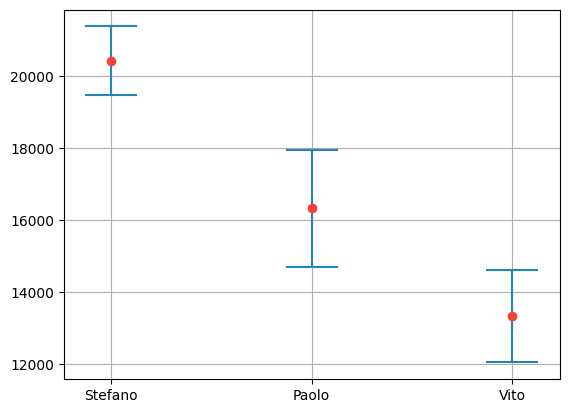

In [28]:
#carico 1
plt.xticks(ticks=[1, 2, 3], labels=['Stefano', 'Paolo', 'Vito'])
plot_confidence_interval(1,data_stefano[0])
plot_confidence_interval(2,data_paolo[0])
plot_confidence_interval(3,data_vito[0])
plt.grid()
plt.show()

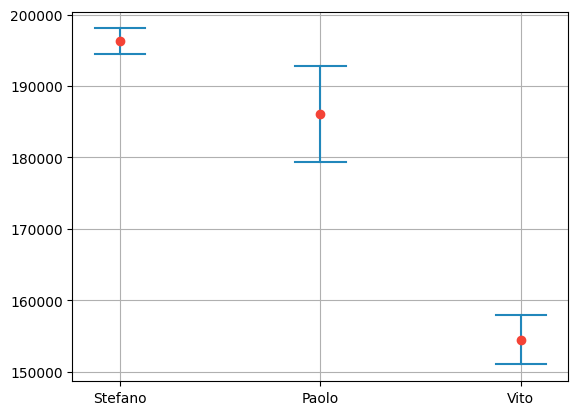

In [29]:
#carico 2
plt.xticks(ticks=[1, 2, 3], labels=['Stefano', 'Paolo', 'Vito'])
plot_confidence_interval(1,data_stefano[1])
plot_confidence_interval(2,data_paolo[1])
plot_confidence_interval(3,data_vito[1])
plt.grid()
plt.show()

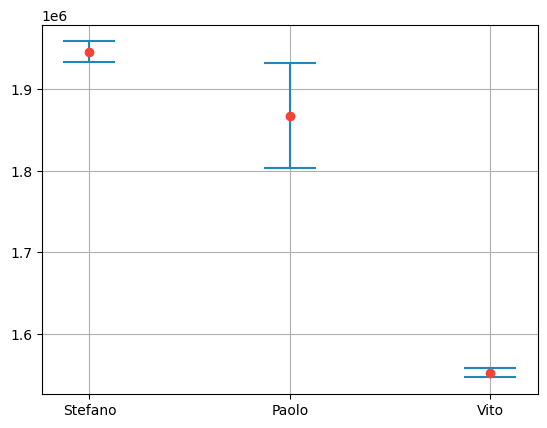

In [30]:
#carico 3
plt.xticks(ticks=[1, 2, 3], labels=['Stefano', 'Paolo', 'Vito'])
plot_confidence_interval(1,data_stefano[2])
plot_confidence_interval(2,data_paolo[2])
plot_confidence_interval(3,data_vito[2])
plt.grid()
plt.show()